In [2]:

# %run Gradient_descent.py
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" 
_df=pd.read_csv(url, header=None)
#print(_df[1:10])
d = _df.values

In [4]:
_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
x=_df[23].values

print(x)
print(x.shape)

[21 21 19 24 18 19 19 19 17 16 23 23 21 21 20 16 16 15 47 38 38 37 31 24
 31 31 31 24 24 19 49 31 38 30 30 30 30 27 27 27 27 24 25 24 38 38 24 15
 15 13 30 31 31 31 31 17 17 17 16 26 26 26 26 36 26 19 31 22 22 22 22 16
 16 14 14 19 37 31 31 24 23 25 19 19 19 25 25 23 23 31 45 31 31 31 31 31
 31 31 31 27 27 17 17 19 19 17 19 19 28 19 25 19 28 19 25 19 28 18 37 24
 31 31 31 24 19 19 17 17 17 17 23 23 21 21 21 21 19 19 31 26 26 32 28 26
 24 24 28 25 23 23 35 31 31 31 27 27 30 30 34 38 38 28 28 29 29 26 26 24
 24 24 24 24 24 29 30 27 27 27 20 19 20 19 37 27 37 27 27 37 26 24 24 19
 33 25 23 23 24 24 17 17 23 19 18 26 19]
(205,)


In [6]:
x=np.reshape(x, (len(x), 1))
print(x.shape)
#print(x)

(205, 1)


In [7]:
y=_df[24].values
print(y)
y=np.reshape(y, (len(y), 1))

[27 27 26 30 22 25 25 25 20 22 29 29 28 28 25 22 22 20 53 43 43 41 38 30
 38 38 38 30 30 24 54 38 42 34 34 34 34 33 33 33 33 28 31 29 43 43 29 19
 19 17 31 38 38 38 38 23 23 23 23 32 32 32 32 42 32 27 39 25 25 25 25 18
 18 16 16 24 41 38 38 30 30 32 24 24 24 32 32 30 30 37 50 37 37 37 37 37
 37 37 37 34 34 22 22 25 25 23 25 24 33 24 25 24 33 24 25 24 33 24 41 30
 38 38 38 30 24 27 25 25 25 28 31 31 28 28 28 28 26 26 36 31 31 37 33 32
 25 29 32 31 29 23 39 38 38 37 32 32 37 37 36 47 47 34 34 34 34 29 29 30
 30 30 30 30 30 34 33 32 32 32 24 24 24 24 46 34 46 34 34 42 32 29 29 24
 38 31 28 28 28 28 22 22 28 25 23 27 25]


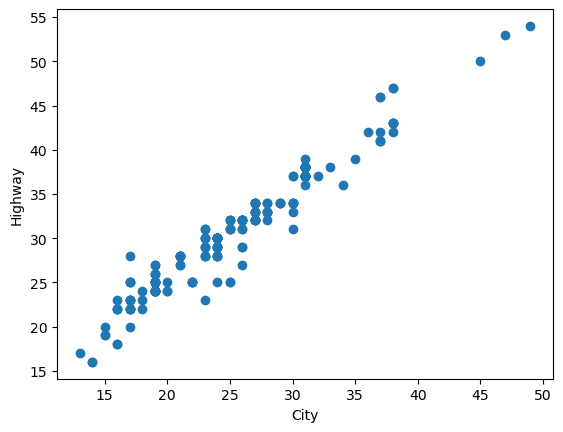

In [8]:
plt.scatter(x,y)
plt.xlabel("City");
plt.ylabel("Highway");

### Linear Regression ###

we want to train an algorithm that will find the best line that will predict the highway gas mileage of a car given its city mileage.

thant is:

$$
f_{w,b}(x)=w*x+b
$$

where $f$ is the target higway mileage and $x$ is the city mileage. Here w is called the **parameters** (also called **weights**) and b is the y intercept.


### The Cost Function ###

Given a set of cars with highway and city mileage how do we pick the best w and b? One reasonalbe mehtod would be to make $f_{w,b}(x)$ close to y for the data that we hav We will formaliz this by defining a function that measures, for each alue of w and b, how close is $f$ to the corresponding y. We define the cost function as:

$$
j(w,b)=\frac{1}{2m}\sum_{i=1}^m (f_{w,b}(x_i)-y_i)^2
$$

where $m$ is the number of training examples and i is the $i^{th}$ training example. 

Lets Define the cost function in Python:

In [9]:
def Cost(w,b,x,y):
    # We take in a w,b value and a vector of features x and the target y#
    
    C=.5*1/x.shape[0]*np.sum((w*x+b-y)**2)
    
    return C

Lets see how it runs:

In [10]:
C=Cost(0,0,x,y)
print(C)

496.4146341463415


## Gradient Descent ##

Now we wnat to minimize the cost function to the smallest possible value. that is we want to find:

$\underset{w,b}{\arg\min} \hspace{2mm} f(w,b) $ 

To do this we can us a little bit of calculus.

### The Minimum of a Function ###

To find the minimum of a function that we know we can set the derivative equal to zero and solve. Now we know form Calc I that finding the derivative function and setting it to 0 is no trivial manner an we can only get an approximate number.

Find the minimum of $x^3+3x^2-2x+9$

However using the derivative as a  way to estimate it can be more approachable. This is also mcuh more doable for a computer as well. Let's say we are at a point $x_0$ that is away from the minimum, we can tak a step in the direction of the minimum using the $f'(x_0)$. That is to say, we can start at some point $x_0$ and find the next point $x_1$ that is closer to the minimum by subtracting $f'(x_0)$. Now the problem is we may not want to take a full step in the direction of the derivative as this might over shoot the minimum. Therfore we add an additional parameter $\alpha$ which we call the learning rate. This tells us how far in the direction of the derivative we want to go. Therfore we get the equation:

$$
x_{n+1}=x_n-\alpha*f'(x_n)
$$

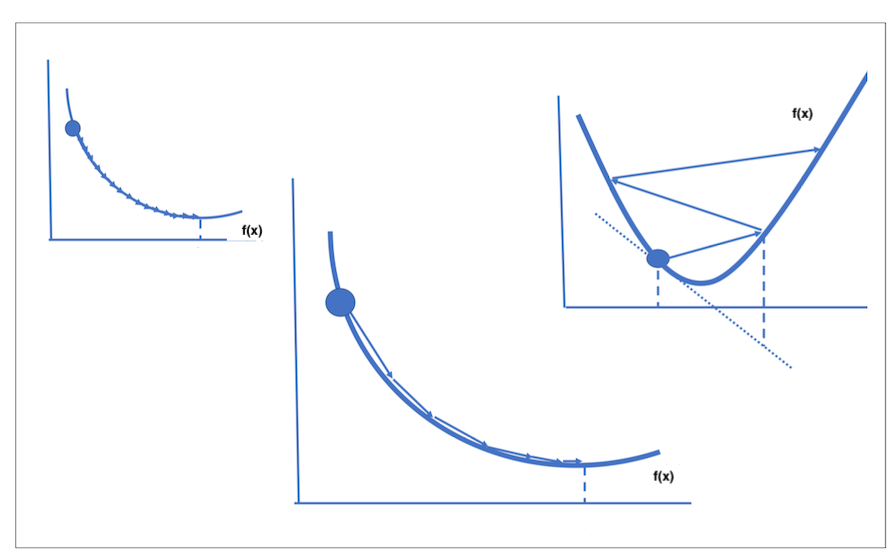
### The Update Algorithm ###

Now we can formulate this into an algorithm:

inputs: $x_0$, and $f'(x_0)$ and $\alpha$

1. Start at x=x_0 

2. update x by $x_{n+1}=x_n-\alpha*f'(x_n)$

3. repeat until  convergence

### The LMS algorithm ###

Now getting back to the problem at hand. We want to find a w and b that minimizes $J(w,b)$. To do this we will take an intial guess for w and b and then reapeatedly change wand b to make $J(w,b)$ smaller unitll we converge to a w and b that minimizes $J(w,b)$ using gradient descent. In this case the function $J(w,b)$ is multivariable so instead of just the derivativve we need to look at the gradient of the cost function $\frac{\partial}{\partial w}J(w,b)$ and $\frac{\partial}{\partial b}J(w,b)$. Therfore we can update the paramters w and b by the following:

$$
w=w-\alpha \frac{\partial}{\partial w}J(w,b)
$$

$$
b=b-\alpha \frac{\partial}{\partial b}J(w,b)
$$

Again, $\alpha$ is called the learning rate and we take a small step in the direction of steepest descent but in a multi dimensional space.

To understand this algortihm lets work out the partial derivatives with $j(w,b)=\frac{1}{2m}\sum_{i=1}^m (w*(x_i)+b-y_i)^2$

$$
\frac{\partial}{\partial w}J(w,b)=\frac{1}{2m} \sum_{i=1}^m (\frac{\partial}{\partial w} ((w*x_i)+b-y_i)^2= \frac{1}{2m} \sum_{i=1}^m 2*((w*x_i)+b-y_i)*x_i=\frac{1}{m} \sum_{i=1}^m (f_{w,b}(x_i)-y_i)*x_i
$$

$$
\frac{\partial}{\partial b}J(w,b)=\frac{1}{2m} \sum_{i=1}^m (\frac{\partial}{\partial b} ((w*x_i)+b-y_i)^2= \frac{1}{2m} \sum_{i=1}^m 2*((w*x_i)+b-y_i)=\frac{1}{m} \sum_{i=1}^m (f_{w,b}(x_i)-y_i)
$$

Therfore the updates for the algorithm become:

$$
w=w-\alpha*\frac{1}{m}*\sum_{i=1}^m (f_{w,b}(x_i)-y_i)*x_i
$$
and
$$
b=b- \alpha*\frac{1}{m} *\sum_{i=1}^m (f_{w,b}(x_i)-y_i)
$$

Now using some linear algebra we can rewrite this whole update equation in a more efficient way. First lets consider x as a matrix with a column of ones appended to it and call it $\textbf{X}$. We want to minimize the following:

$$
\underset{w \in \mathbb{R}^n}{\arg\min} \hspace{2mm} \frac{1}{2}||Xw-y||_2^2= \underset{w \in \mathbb{R}^n}{\arg\min} \hspace{2mm}  \frac{1}{2}\sum_{i=1}^n (Xw-y)^2
$$


Here our cost funtion is now a vector valued function in $\mathbb{R}^n$ and for this particular problem n=2.
Now we need the gradient of this norm. We will not get into the details to much. But taking the derivative with respect to w gives us:

$$
\nabla \frac{1}{2}||Xw-y||_2^2= X^T(Xw-y)
$$

Now we can write the update as:

$$
w_{n+1}=w_n-\alpha X^T(Xw_n-y)
$$

In [11]:
w=np.array([[1.02],[4.9]])
ones=np.ones([x.shape[0]])
ones=np.reshape(ones, (len(ones), 1))
#print(x.shape)
#print(ones)
print(ones.shape)
x_ones=np.append(ones,x,axis=1)

#print(w.shape)
print(x_ones.shape)
#print(x_ones.Tx_ones@w)
print(y.shape)
#print(x_ones@w)
w_best,wbest_hist,cost=gradient_descent(x_ones,y,w,.001,100000)

print(w_best)

(205, 1)
(205, 2)
(205, 1)


NameError: name 'gradient_descent' is not defined

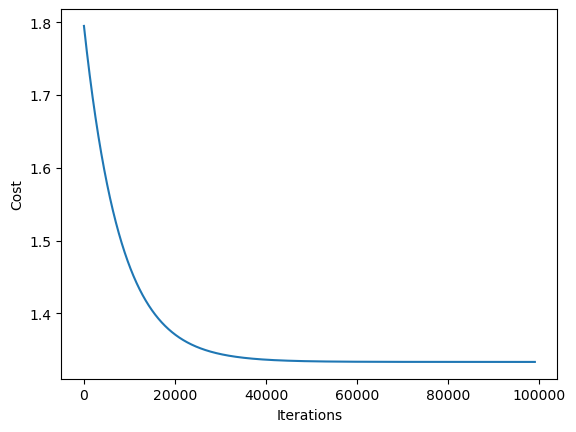

In [111]:
plt.plot(np.arange(1,99000),cost[1001:100000])
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [21]:
lin_reg=LinearRegression().fit(x,y)
print(lin_reg.coef_[0])
print(lin_reg.intercept_[0])

[1.02245681]
4.965357454130995


In [22]:
w_sk=lin_reg.coef_[0]

b_sk=lin_reg.intercept_[0]

Cost(w_sk,b_sk,x,y)

1.333270058436946

In [116]:
Cost(w_best[1],w_best[0],x,y)

1.333271941032359